In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')




In [3]:
# Define paths to your dataset
train_path = "/content/drive/MyDrive/Major Dataset/train"
validation_path = "/content/drive/MyDrive/Major Dataset/validation"
test_path = "/content/drive/MyDrive/Major Dataset/test"



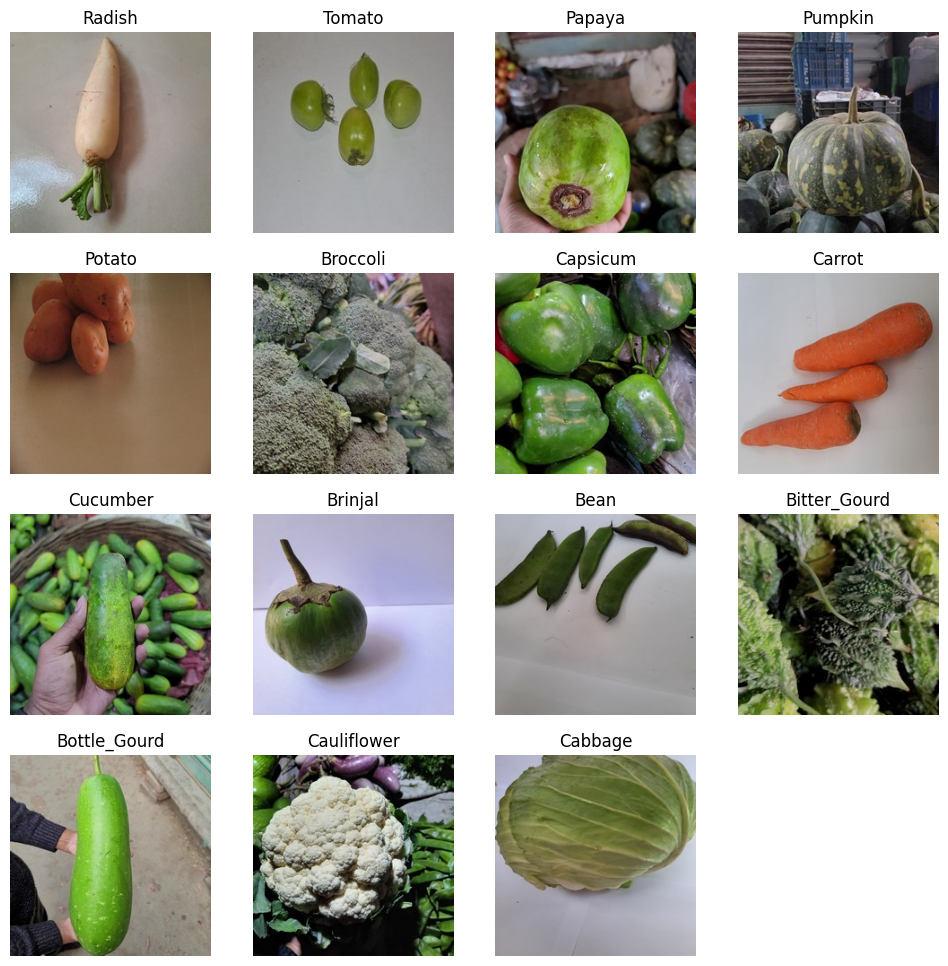

In [4]:
# Get the list of vegetable categories
image_categories = os.listdir('/content/drive/MyDrive/Major Dataset/train')

# Function to plot sample images
def plot_images(image_categories):
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img) / 255.0
        plt.subplot(4, 4, i + 1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
    plt.show()

# Plot sample images
plot_images(image_categories)



In [5]:
# Create ImageDataGenerator for train, validation, and test sets
train_gen = ImageDataGenerator(rescale=1.0 / 255.0)
train_image_generator = train_gen.flow_from_directory(train_path, target_size=(150, 150), batch_size=32, class_mode='categorical')

val_gen = ImageDataGenerator(rescale=1.0 / 255.0)
val_image_generator = val_gen.flow_from_directory(validation_path, target_size=(150, 150), batch_size=32, class_mode='categorical')

test_gen = ImageDataGenerator(rescale=1.0 / 255.0)
test_image_generator = test_gen.flow_from_directory(test_path, target_size=(150, 150), batch_size=32, class_mode='categorical')



Found 15021 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3006 images belonging to 15 classes.


In [6]:
# Class encodings
class_map = {v: k for k, v in train_image_generator.class_indices.items()}
print(class_map)



{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


In [7]:
# Build a custom CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))


In [8]:

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




In [ ]:
# Train the model
history = model.fit(train_image_generator, epochs=10, validation_data=val_image_generator)


In [12]:
# Fit the model
history = model.fit(
    train_image_generator,
    epochs=10,
    verbose=1,
    validation_data=val_image_generator,
    workers=10
)

Epoch 1/10
470/470 [==============================] - 841s 2s/step - loss: 1.1806 - accuracy: 0.6063 - val_loss: 0.5062 - val_accuracy: 0.8340
Epoch 2/10
470/470 [==============================] - 778s 2s/step - loss: 0.5050 - accuracy: 0.8356 - val_loss: 0.3127 - val_accuracy: 0.9067
Epoch 3/10
470/470 [==============================] - 799s 2s/step - loss: 0.2984 - accuracy: 0.9035 - val_loss: 0.2408 - val_accuracy: 0.9270
Epoch 4/10
470/470 [==============================] - 803s 2s/step - loss: 0.2054 - accuracy: 0.9327 - val_loss: 0.2573 - val_accuracy: 0.9380
Epoch 5/10
470/470 [==============================] - 806s 2s/step - loss: 0.1479 - accuracy: 0.9523 - val_loss: 0.2398 - val_accuracy: 0.9393
Epoch 6/10
470/470 [==============================] - 767s 2s/step - loss: 0.1210 - accuracy: 0.9617 - val_loss: 0.2506 - val_accuracy: 0.9350
Epoch 7/10
470/470 [==============================] - 758s 2s/step - loss: 0.1003 - accuracy: 0.9668 - val_loss: 0.1900 - val_accuracy: 0.9503

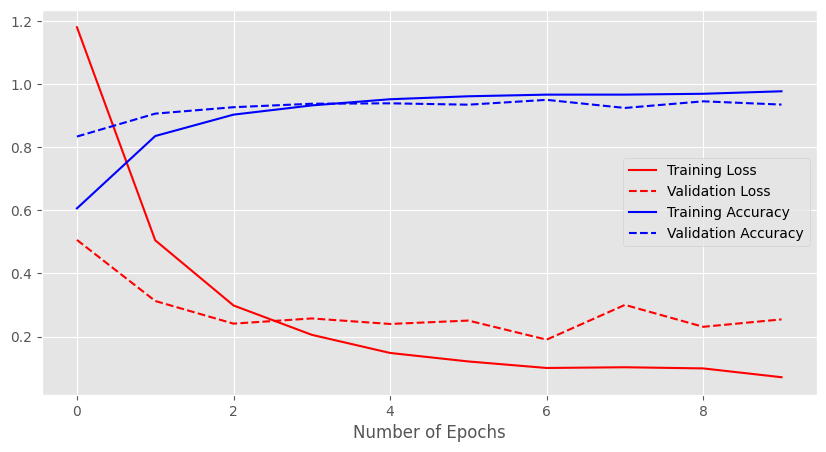

In [13]:
h = history.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [14]:

# Evaluate the model
test_loss, test_acc = model.evaluate(test_image_generator)
print(f"Test accuracy: {test_acc:.2f}")

94/94 [==============================] - 686s 7s/step - loss: 0.2044 - accuracy: 0.9441
Test accuracy: 0.94


In [15]:
# Save the model
model.save('vegetable_classifier_model.h5')

1/1 [==============================] - 0s 224ms/step


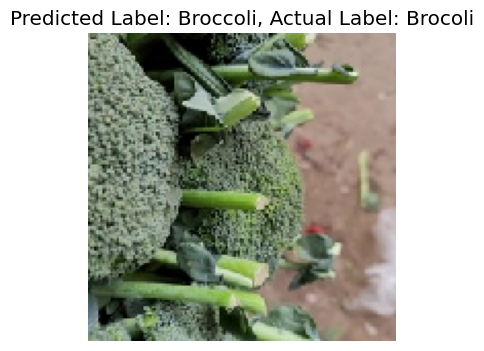

In [39]:
# Testing the Model
test_image_path = '/content/drive/MyDrive/Major Dataset/test/Broccoli/1011.jpg'

def generate_predictions(test_image_path, actual_label):

    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path, actual_label='Brocoli')


1/1 [==============================] - 0s 122ms/step


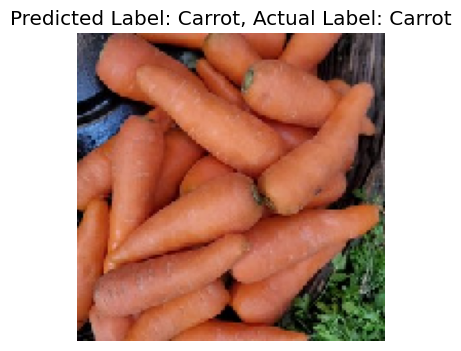

In [34]:
# Testing the Model
test_image_path = '/content/drive/MyDrive/Major Dataset/test/Carrot/1011.jpg'

def generate_predictions(test_image_path, actual_label):

    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path, actual_label='Carrot')


1/1 [==============================] - 0s 38ms/step


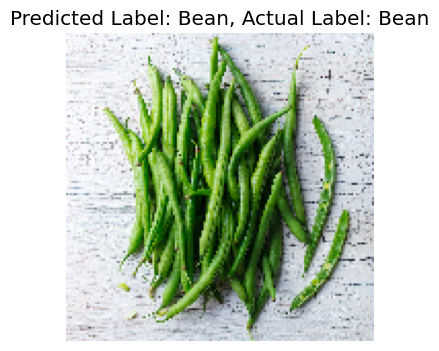

In [24]:
# Generate predictions for external images
external_image_path_1 = "./beans.jpg?dl=0"
generate_predictions(external_image_path_1, actual_label='Bean')

In [ ]:
!wget "https://www.dropbox.com/s/lge1plvr4mg5w7y/potato_2.jpg?dl=0"

1/1 [==============================] - 0s 38ms/step


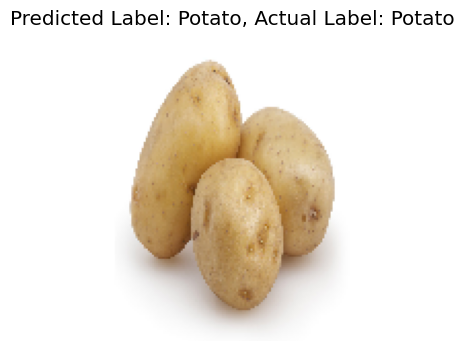

In [41]:
# Generate predictions for external image
external_image_path_2 = "./potato_2.jpg?dl=0"
generate_predictions(external_image_path_2, actual_label='Potato')
